# Project Starter


In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load dataset
df = pd.read_csv('data/raw/thyroidDF.csv')

In [3]:
# Display first few rows of the dataset
df.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,target,patient_id
0,29,F,f,f,f,f,f,f,f,t,...,NaN,f,NaN,f,NaN,f,NaN,other,-,840801013
1,29,F,f,f,f,f,f,f,f,f,...,128.0,f,NaN,f,NaN,f,NaN,other,-,840801014
2,41,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,11.0,other,-,840801042
3,36,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,26.0,other,-,840803046
4,32,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,36.0,other,S,840803047


In [4]:
# Display Info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9172 entries, 0 to 9171
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  9172 non-null   int64  
 1   sex                  8865 non-null   object 
 2   on_thyroxine         9172 non-null   object 
 3   query_on_thyroxine   9172 non-null   object 
 4   on_antithyroid_meds  9172 non-null   object 
 5   sick                 9172 non-null   object 
 6   pregnant             9172 non-null   object 
 7   thyroid_surgery      9172 non-null   object 
 8   I131_treatment       9172 non-null   object 
 9   query_hypothyroid    9172 non-null   object 
 10  query_hyperthyroid   9172 non-null   object 
 11  lithium              9172 non-null   object 
 12  goitre               9172 non-null   object 
 13  tumor                9172 non-null   object 
 14  hypopituitary        9172 non-null   object 
 15  psych                9172 non-null   o

In [5]:
# Show only columns with missing values
missing_data = df.isnull().sum()
missing_data = missing_data[missing_data > 0]

missing_data

sex     307
TSH     842
T3     2604
TT4     442
T4U     809
FTI     802
TBG    8823
dtype: int64

In [6]:
# Statistical summary of the dataset
df.describe()

,age,TSH,T3,TT4,T4U,FTI,TBG,patient_id
count,9172.000000,8330.000000,6568.000000,8730.000000,8363.000000,8370.000000,349.000000,9.172000e+03
mean,73.555822,5.218403,1.970629,108.700305,0.976056,113.640746,29.870057,8.529473e+08
std,1183.976718,24.184006,0.887579,37.522670,0.200360,41.551650,21.080504,7.581969e+06
min,1.000000,0.005000,0.050000,2.000000,0.170000,1.400000,0.100000,8.408010e+08
25%,37.000000,0.460000,1.500000,87.000000,0.860000,93.000000,21.000000,8.504090e+08
50%,55.000000,1.400000,1.900000,104.000000,0.960000,109.000000,26.000000,8.510040e+08
75%,68.000000,2.700000,2.300000,126.000000,1.065000,128.000000,31.000000,8.607110e+08
max,65526.000000,530.000000,18.000000,600.000000,2.330000,881.000000,200.000000,8.701190e+08


# Target Distribution

The original dataset has over 30 codes. For a meaningful ML project, we group these into logical medical categories. Even after grouping, we see a significant class imbalance.


In [7]:
# Target Simplification for EDA
def map_target(target):
    if target == '-':
        return 'Normal'
    elif any(c in target for c in ['A', 'B', 'C', 'D']):
        return 'Hyperthyroid'
    elif any(c in target for c in ['E', 'F', 'G', 'H']):
        return 'Hypothyroid'
    else:
        return 'Other'

df['mapped_target'] = df['target'].apply(map_target)

In [8]:
# Explore the counts of each category
df['mapped_target'].value_counts()

mapped_target
Normal          6771
Other           1493
Hypothyroid      667
Hyperthyroid     241
Name: count, dtype: int64

Text(0.5, 1.0, 'Distribution of Thyroid Conditions')

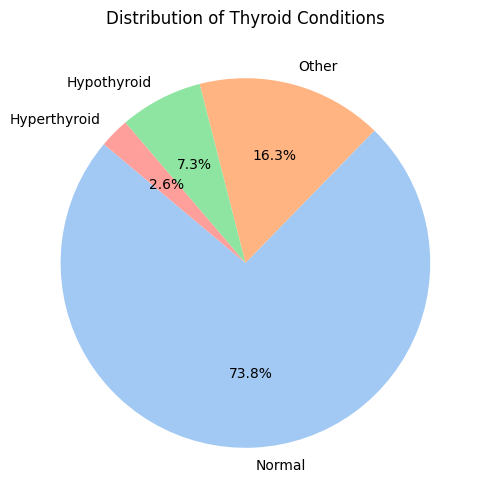

In [9]:
# Visualization of target distribution
plt.figure(figsize=(8, 6))

colors = sns.color_palette('pastel')[0:5]
plt.pie(df['mapped_target'].value_counts(), labels=df['mapped_target'].value_counts().index, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Thyroid Conditions')

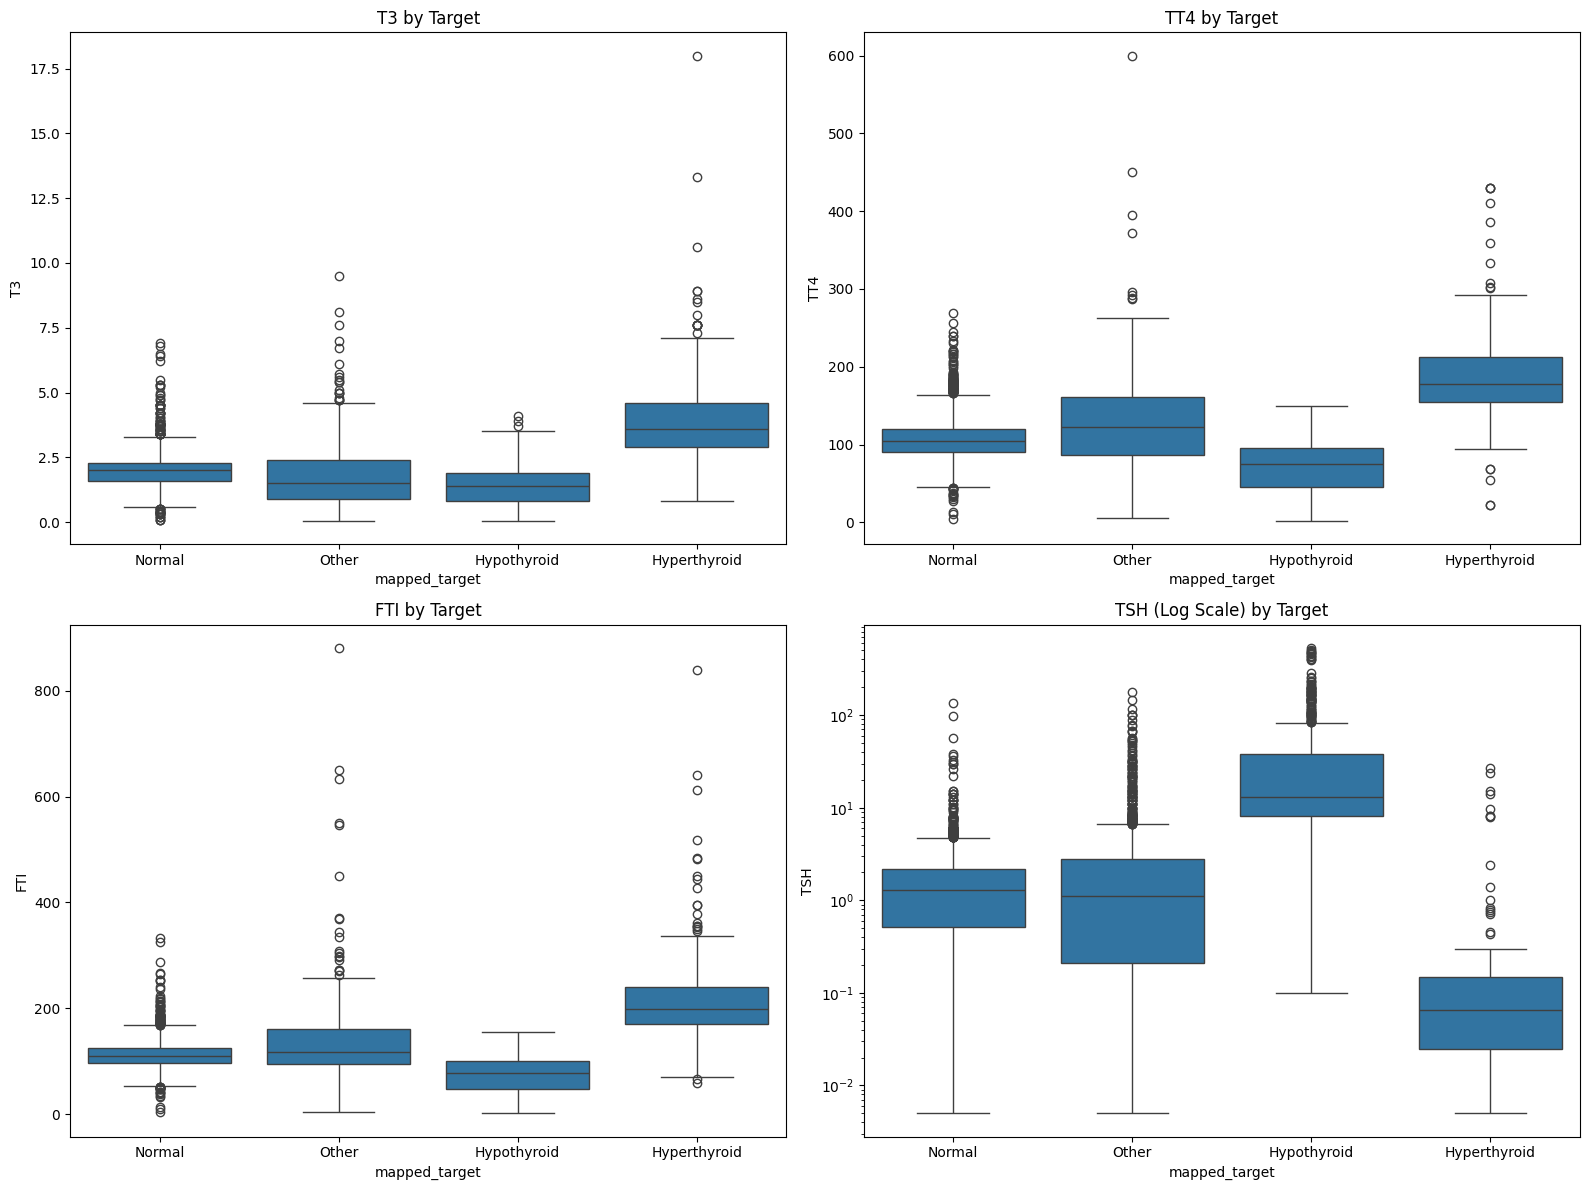

In [10]:
# Lab Results vs Target Analysis
lab_cols = ['T3', 'TT4', 'FTI', 'TSH']
plt.figure(figsize=(16, 12))
for i, col in enumerate(lab_cols, 1):
    plt.subplot(2, 2, i)
    # Using log scale for TSH because of extreme skewness
    if col == 'TSH':
        sns.boxplot(x='mapped_target', y=df[col], data=df)
        plt.yscale('log')
        plt.title(f'{col} (Log Scale) by Target')
    else:
        sns.boxplot(x='mapped_target', y=df[col], data=df)
        plt.title(f'{col} by Target')
plt.tight_layout()

You will need to use metrics like F1-score or Precision-Recall rather than just Accuracy, as a model could simply guess "Normal" and be correct 80% of the time.


# Logic Checks

- Sex vs. Pregnancy: We confirmed there are 103 pregnant females and 0 pregnant males. This indicates the sex and pregnant columns are consistent.
- Age Errors: We found patients whose aged 65,000+ years.


In [11]:
# Checking Sex vs Pregnancy
logic_check = pd.crosstab(df['sex'], df['pregnant'])
print("Logic Check: Sex vs Pregnancy")
print(logic_check)

Logic Check: Sex vs Pregnancy
pregnant     f    t
sex                
F         5970  103
M         2792    0


In [12]:
# Checking for Age Anomalies
age_anomalies = df[(df['age'] < 0) | (df['age'] > 120)]
print(f"Number of age anomalies: {len(age_anomalies)} found.")

# Displaying Age Anomalies
age_anomalies['age']

Number of age anomalies: 4 found.


2976      455
5710    65511
6392    65512
8105    65526
Name: age, dtype: int64

# Missing Value Pattern

The Missing Data Heatmap reveals that:

- TBG is missing in almost 96% of the records. It is medically redundant if we have T3 and T4, and statistically useless due to the missingness.

- T3 is missing in ~28% of cases. Since T3 is a key diagnostic feature, we cannot just drop these rows; we must use Imputation (filling with the median).


Text(0.5, 1.0, 'Missing Data Heatmap')

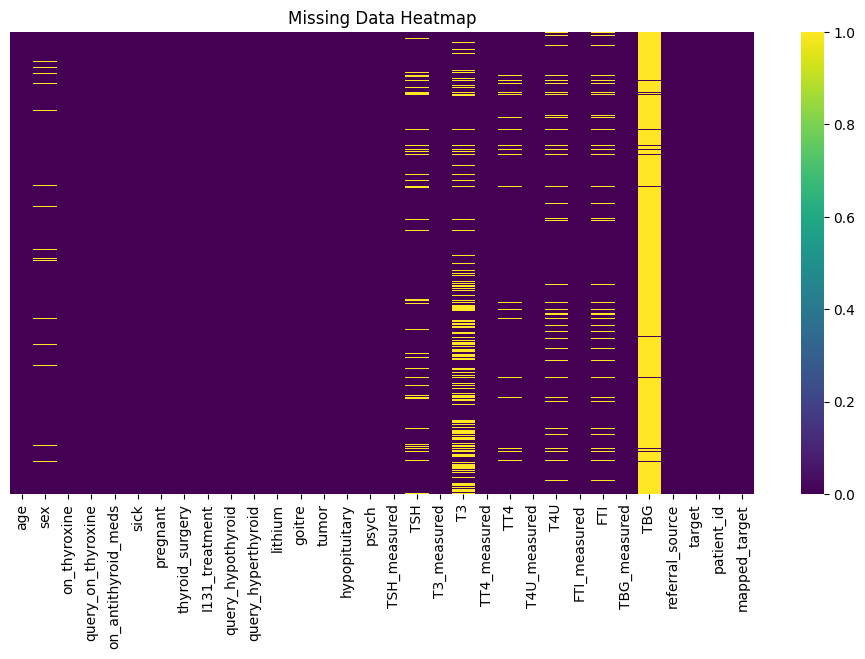

In [13]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), yticklabels=False, cmap='viridis')
plt.title('Missing Data Heatmap')

# Lab Results & Diagnostic Power

When we plot lab results (TSH, T3, T4) against our diagnosis categories, the patterns are
clear:

- TSH (Thyroid Stimulating Hormone): This is the strongest indicator. Hypothyroid patients show significantly higher TSH levels (often 10x–100x normal), while Hyperthyroid patients show near-zero levels.

- T3 & TT4: These show the inverse relationship. High T3/T4 often points to Hyperthyroidism.


In [14]:
# Correlation with target (simplified)
# Convert mapped_target to numeric for correlation
df['target_code'] = df['mapped_target'].astype('category').cat.codes
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
corr_target = df[numeric_cols].join(df['target_code']).corr()['target_code'].sort_values(ascending=False)

corr_target

target_code    1.000000
TBG            0.498485
T4U            0.060175
TT4            0.053840
patient_id     0.008890
age           -0.001206
FTI           -0.010567
TSH           -0.206926
T3            -0.215602
Name: target_code, dtype: float64

# Data Cleaning

Based on the previous data concluded earlier from the EDA. We now need to clean our data to work on the ML Project. So, Let's get started.


In [15]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder

## Fix Age Outliers

We chose to replace age columns with the median since outliers are too small to affect the data and also the median isn't affected by them either.


In [16]:
# Replace ages > 100 with the median age of the dataset
df.loc[df['age'] > 100, 'age'] = df['age'].median()

## Missing Values

Since we have one column `TBG` as 96% empty, then we can drop it as it has no actual use in the analysis as a whole. Moreover, some columns like `patient_id`, `referral_source` don't help the model with prediction


In [17]:
# Drop unnecessary columns
df.drop(columns=['TBG', 'patient_id', 'referral_source'], axis=1, inplace=True)

## Binary Encoding of Categorical Variables to Numerical

We need to convert categorical variables into numerical format for model compatibility. columns such as `sex` we need to convert it into numerical values. from t/f to 0/1

- Male (M): 1
- Female (F): 0


In [18]:
# Map sex and all t/f values to 0/1
df['sex'] = df['sex'].map({'F': 0, 'M': 1})

In [19]:
# Do the same for other boolean columns (Categorical into Numeric)
numeric_cols = ['on_thyroxine', 'query_on_thyroxine', 'on_antithyroid_meds', 
               'sick', 'pregnant', 'thyroid_surgery', 'I131_treatment', 
               'query_hypothyroid', 'query_hyperthyroid', 'lithium', 
               'goitre', 'tumor', 'hypopituitary', 'psych', 
               'TSH_measured', 'T3_measured', 'TT4_measured', 
               'T4U_measured', 'FTI_measured', 'TBG_measured']

for col in numeric_cols:
    df[col] = df[col].map({'f': 0, 't': 1})

## Target Simplification

We handle categorical data into category letter labels for simplicity's sake.

In [20]:
def simplify_target(target):
    if target == '-': return 0
    if any(c in target for c in ['A', 'B', 'C', 'D']): return 1
    if any(c in target for c in ['E', 'F', 'G', 'H']): return 2
    return 3

df['target'] = df['target'].apply(simplify_target)

## Handling Missing Values
- We use median for lab results because as we can see, they are highly skewed
- Sex is also imputed (with median/mode) just in case

In [21]:
imputer = SimpleImputer(strategy='median')

cols_to_fix = ['TSH', 'T3', 'TT4', 'T4U', 'FTI', 'sex']
df[cols_to_fix] = imputer.fit_transform(df[cols_to_fix])

## Feature Scaling

In [22]:
scaler = StandardScaler()
num_features = ['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI']
df[num_features] = scaler.fit_transform(df[num_features])

In [23]:
df.to_csv('data/processed/thyroid_cleaned.csv', index=False)

# Outro

Now the data is ready for modeling. Once you go through this notebook, Your data is numeric, cleaned from logic errors, and scaled perfectly as needed, and missing values are handled correctly.